# Data Visualization Ethics Challenge

In this activity, you’ll work with a simple dataset and examine two deliberately bad charts.  
Each one ignores multiple best practices for ethical and effective visualization.

Your job is to:

1. Review each chart and note at least three issues you see.  
2. Create a new chart (or charts) that present the data clearly, accurately, and honestly.  
3. Include clear labels, a cited data source, and a descriptive but neutral title.

**Remember:** Strong visualizations tell the truth, provide context, and avoid design choices that distort or mislead.


## Step 1: Load the dataset

We’re using a provided CSV file with fictional sales data for a coffee chain.  
No need to modify anything in this cell — just run it so the dataset loads into your notebook.  
Once loaded, take a quick look at the first few rows to get familiar with the columns and values.


In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

coffee_df = pd.read_csv("fake_coffee_chain_sales.csv")
coffee_df.head()

,Year,Month,Region,Category,Sales,Profit
0,2020,January,East,Espresso,14724,5290.46
1,2020,January,East,Lattes,11948,4138.77
2,2020,January,East,Tea,18660,5959.44
3,2020,January,East,Pastries,11265,2604.46
4,2020,January,East,Beans,8954,2613.22


## Step 2: Review the BAD Charts

Below are two deliberately poor visualizations.  
Your task: Carefully review each and take notes on what you think is wrong, misleading, or just poorly designed.  
Think about chart type, colors, scales, labeling, and whether the chart tells the truth.  


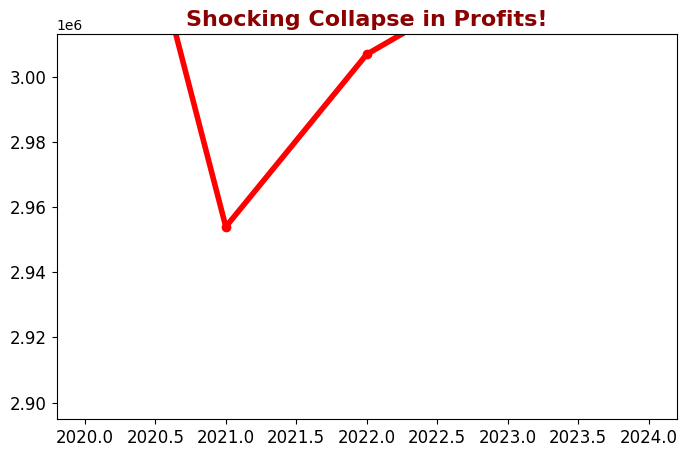

In [77]:
plt.figure(figsize=(8,5))
subset = coffee_df.groupby("Year")["Sales"].sum().reset_index()

# Wrong variable for title, truncated y-axis, misleading color & framing
plt.plot(subset["Year"], subset["Sales"], color="red", linewidth=4, marker="o")
plt.ylim(subset["Sales"].min() * 0.98, subset["Sales"].min() * 1.02)  # extreme truncation
plt.title("Shocking Collapse in Profits!", fontsize=16, fontweight="bold", color="darkred")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


### Write your notes about bad chart #1 here:

-No labels or scale on either axis
-Trend is down and then back up, not a shocking drop
-Colors are bad
-Profits isn't a column of data, title is misleading
-No data in bottom half of chart, lines extend beyond edges
-The. Drama.
-Scale is bad on both axis, range inappropriate on the y, measuring years by 0.5 is nonsense

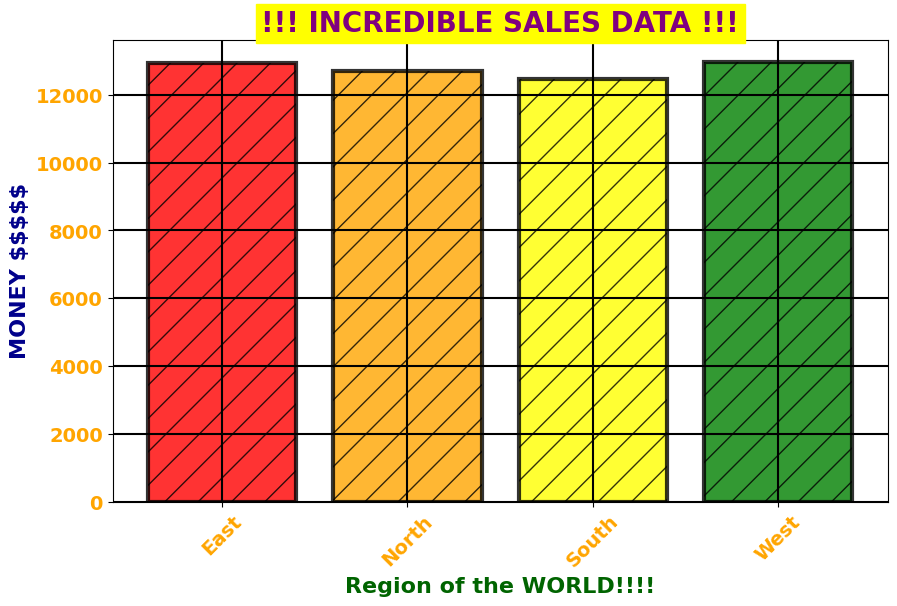

In [78]:
plt.figure(figsize=(10,6))
avg_sales = coffee_df.groupby("Region")["Sales"].mean().reset_index()

colors = ["red","orange","yellow","green","blue","purple"]

plt.bar(avg_sales["Region"], avg_sales["Sales"], 
        color=colors, edgecolor="black", linewidth=3, hatch="/", alpha=0.8)
plt.title("!!! INCREDIBLE SALES DATA !!!", fontsize=20, fontweight="bold", color="purple", backgroundcolor="yellow")
plt.grid(True, which='both', color='black', linestyle='-', linewidth=1.5)
plt.xlabel("Region of the WORLD!!!!", fontsize=16, fontweight="bold", color="darkgreen")
plt.ylabel("MONEY $$$$$", fontsize=16, fontweight="bold", color="darkblue")
plt.xticks(rotation=45, fontsize=14, fontweight="bold", color="orange")
plt.yticks(fontsize=14, fontweight="bold", color="orange")
plt.show()


### Write your notes about bad chart #2 here:
-COlors not professional -Background texture in bars in unnecessary and distracting - Axis labels are silly -"North, South, East, and West" are not standard recognized regions of the WORLD -Scale doesn't show any meaningful differences - The. Drama. -No units for MONEY amounts

## Step 3: Your Turn – Make It Right

Now it’s your turn to fix things.  

- Start by thinking about a question you want to answer with this dataset.  
- Choose a visualization type that matches your question and the data structure.  
- Apply the best practices from our lessons: clear labeling, appropriate scale, purposeful color, simplicity, and accessibility.  
- Be honest - don’t manipulate the chart to make a point that the data doesn’t support.  

When you’re done, add your chart(s) below. You may create more than one if it helps tell the story better.  


I'm going to see what types of data is in each column.

In [79]:
coffee_df.dtypes

Year          int64
Month        object
Region       object
Category     object
Sales         int64
Profit      float64
dtype: object

I want to see the unique values in the month, region, and category columns to see how the data is structured. First, I'll see how many unique values there are. 

In [80]:
coffee_df.select_dtypes(include=["object", "category"]).nunique()


Month       12
Region       4
Category     5
dtype: int64

Now I'm going to look at the unique values for each list. .unique will return a NumPy array with the list of unique values.

In [81]:
coffee_df["Category"].unique()


array(['Espresso', 'Lattes', 'Tea', 'Pastries', 'Beans'], dtype=object)

In [82]:
coffee_df["Month"].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [83]:
coffee_df["Region"].unique()

array(['East', 'West', 'North', 'South'], dtype=object)

I'm going to check for missing values before I start analysis.

In [84]:
coffee_df.isna().sum()


Year        0
Month       0
Region      0
Category    0
Sales       0
Profit      0
dtype: int64

I'm going to create a new df that is a copy of the original info.

Then I'm going to use groupby to group the rows by category, year, and month. We'll keep the original month order, and keep the data in regular columns.

Next, I'll print the first few rows to check that it worked the way I wanted.

In [85]:
df = coffee_df.copy()

monthly = (df.groupby(["Category","Year","Month"], sort=False, as_index=False)["Sales"].sum())

monthly.head()

,Category,Year,Month,Sales
0,Espresso,2020,January,52379
1,Lattes,2020,January,49578
2,Tea,2020,January,54044
3,Pastries,2020,January,42591
4,Beans,2020,January,34306


I want to create a plot that will show the sales data year over year, to observe for seasonal trends in sales by category and overall.

On each chart, I want the y-axis to have the same limits and scale, so they will be comparable in a meaningful way side by side.

In [86]:
global_max = monthly["Sales"].max()
step = 10000
y_max = int(np.ceil(global_max/step)*step)

I'm going to define categories as a list of all the unique values in that column, and years as the unique year values sorted in order.

In [87]:
categories = monthly["Category"].unique().tolist()
years = sorted(monthly["Year"].unique().tolist())

I'm going to create a plot for each category using a for loop, so that we can see if there are any obvious year over year trends in sales by category. I'm also going to add a line for the average accross all 5 years, which may futher help see if there are any obvious patterns.

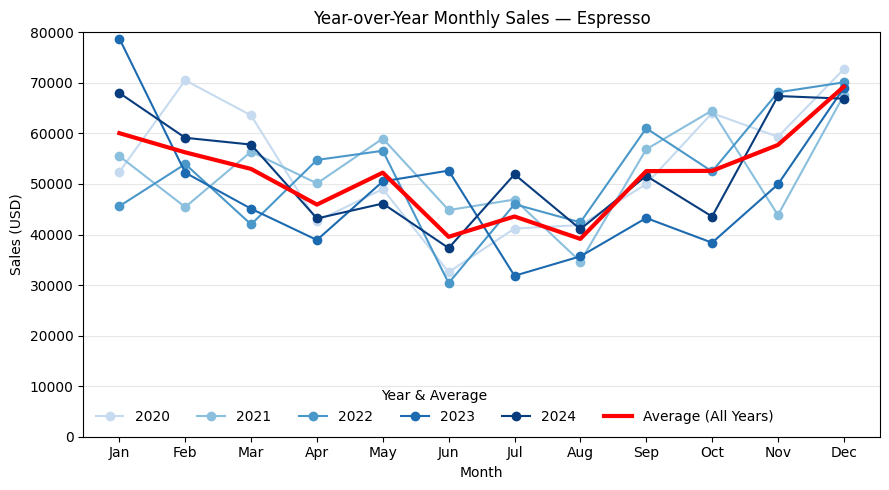

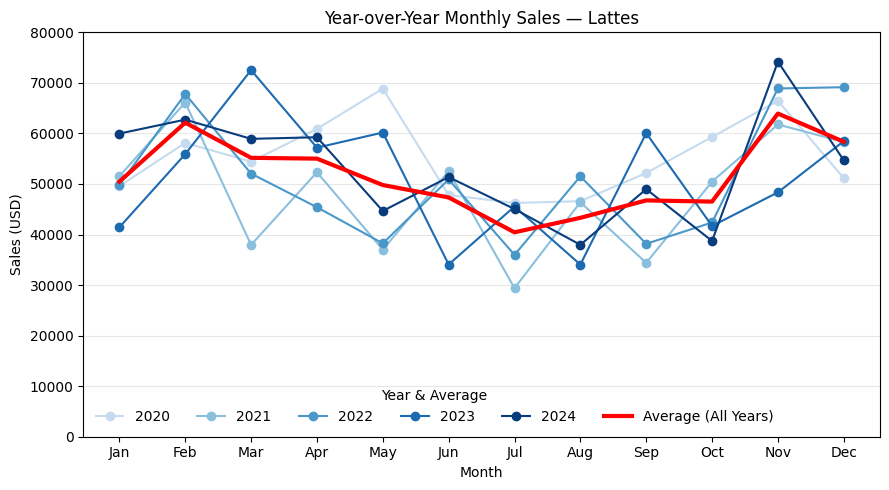

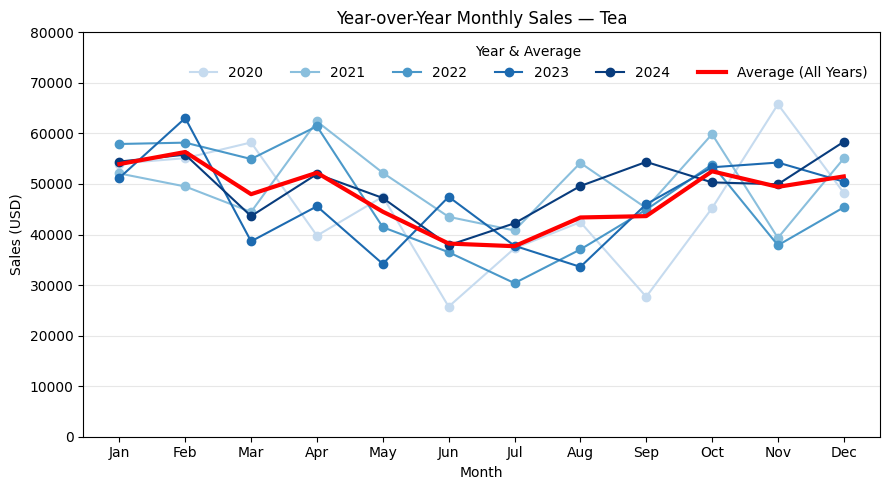

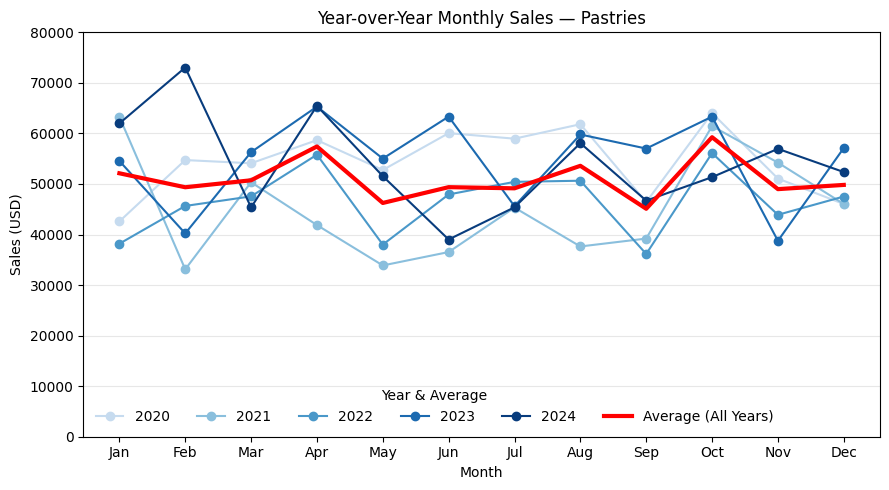

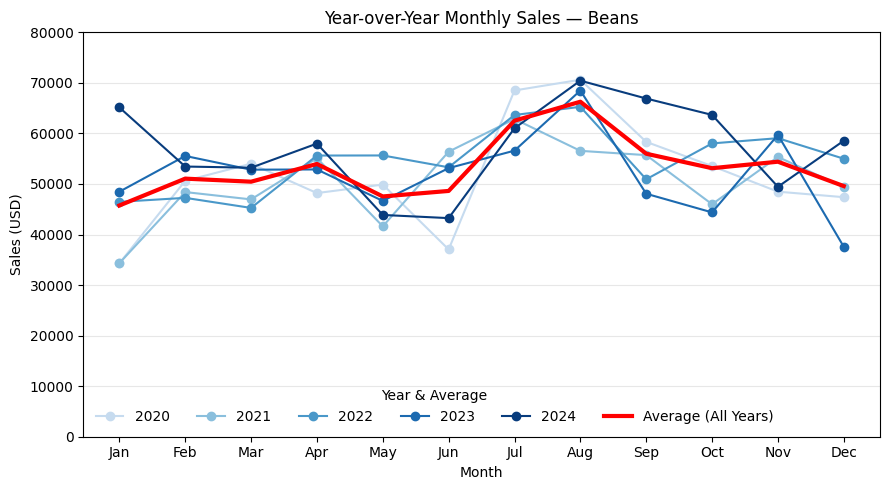

In [88]:
# build a light→dark Blues palette mapped to years (earlier=lighter, later=darker)
cmap = plt.get_cmap("Blues")
n = len(years)
YEAR_COLORS = {y: cmap(0.25 + 0.7 * (i/(n-1) if n > 1 else 0.6)) for i, y in enumerate(sorted(years))}

#Build for loop that will create a figure for each category
for cat in categories:
    sub = monthly[monthly["Category"].eq(cat)].copy()

    # Build month×year pivot table aligned to that month order
    p_raw = sub.pivot_table(index="Month", columns="Year", values="Sales", aggfunc="sum")

    # Average across years per month
    avg_line = p_raw.mean(axis=1).reindex(month_order)

    # For plotting yearly lines, align to month_order
    wide = p_raw.reindex(month_order)

    #Create the figure
    plt.figure(figsize=(9,5))
    for y in years:
        if y in wide.columns:
            plt.plot(month_order, wide[y].values, marker="o", label=int(y), color=YEAR_COLORS[y])

    # Overlay the average line in red
    plt.plot(month_order, avg_line.values, color="red", linewidth=3, label="Average (All Years)")

    # 3-letter month labels on x-axis
    plt.xticks(ticks=month_order, labels=[str(m)[:3] for m in month_order])
    # Define title
    plt.title(f"Year-over-Year Monthly Sales — {cat}")
    #Label for x axis
    plt.xlabel("Month")
    #label for y axis
    plt.ylabel("Sales (USD)")
    #Set limit for y axis based on max value of y, starting at 0
    plt.ylim(0, y_max)
    #Build grid lines on y axis only and lightens them to 30% transparancy
    plt.grid(axis="y", alpha=0.3)
    #Create legend
    plt.legend(title="Year & Average", ncol=min(len(years)+1, 6), frameon=False)
    
    plt.tight_layout()
    plt.show()
